In [2]:
from astropy.table import Table, QTable
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
from astropy.cosmology import FlatLambdaCDM, LambdaCDM
import math
from astropy import units as u
import numpy as np
import scipy
from scipy import integrate
from pylab import *
from matplotlib.font_manager import fontManager, FontProperties


In [134]:
#Table input
t = Table.read('scp.dat',names=("SN","z","sigma z","m X peak","sigma X peak","A X","K BX","m B peak","m B eff","sigma m B eff"), format='ascii')
#X and Y Input 
x = t["z"]
y = t["m B eff"]
zandmb = t["z","m B eff","sigma m B eff"].as_array()
inner_err = t["sigma X peak"] # inner y error bar
outer_err = t["sigma m B eff"] # outer y error bar
shift_err = t["sigma z"] # x axis error bar

In [135]:
def getmag_fit(z,H,om,od): #Caluculating Distance Modulus and geting The magnitude Values
    cosmo = LambdaCDM(H0=H* u.km / u.s / u.Mpc, Om0=om, Ode0=od )
    dm = cosmo.luminosity_distance(z)
    magvalues=[]
    for i in dm:
        mag_fi = -3.17+ (5*np.log10(i.value*H0))
        magvalues.append(mag_fi)
    return magvalues

In [136]:
def plotiy(z,H,om,od,colour,nam): # plotting the given values
    xc = np.sort(z)
    val = getmag_fit(xc,H,om,od)
    plt.plot(xc,val, ls='solid', lw=1.,color=colour,label=nam)

In [137]:
# Models
models = [(0,0,1,'navy','(0,1)'),(0.5,0,0.5,'darkgreen','(0.5,0.5)'),(1,0,0,'goldenrod','(1,0)'),(0.27,0,0.73,'darkred','(0.27,0.73)'),(2,0,0,'magenta','(2,0)')]

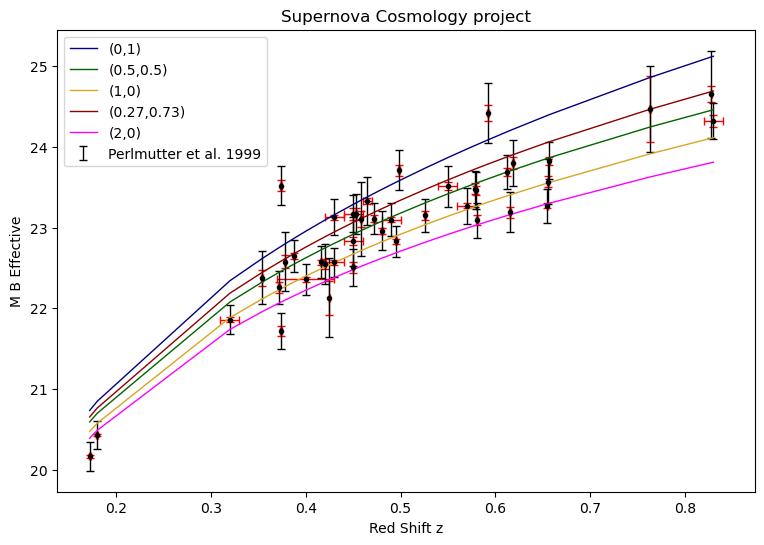

In [138]:
# plotting
plt.figure(figsize=(9,6))

plt.errorbar(x,y,xerr = shift_err,yerr = inner_err, marker='',linestyle='none', ecolor='red',elinewidth=1, capsize=3,capthick=1  )
plt.errorbar(x,y,yerr = outer_err, marker='',linestyle='none', ecolor='black',elinewidth=1, capsize=3,capthick=1 ,label='Perlmutter et al. 1999')

for i,j,k,l,n in models:
    H0 = 71
    plotiy(x,H0,i,k,l,n)
    
plt.plot(x, y, color='black', marker='o', linestyle='none',linewidth=2, markersize=3)

plt.xlabel('Red Shift z')
plt.ylabel('M B Effective')
title('Supernova Cosmology project')
plt.legend(loc=2)
plt.savefig('sne.png', dpi=200.)

In [139]:
def chi_squar(zandmbf, H0, omega_m, omega_lambda):
    zandmb = np.sort(zandmbf)
    chi_x =[]
    chi_x= sorted(chi_x)
    for i,j,k in zandmb:
        z = i
        cosmo = LambdaCDM(H0=H0* u.km / u.s / u.Mpc, Om0=omega_m, Ode0=omega_lambda )
        dm = cosmo.luminosity_distance(z)
        model = -3.17+ (5*np.log10(dm.value*H0))
        data = j
        chi= ((data - model)**2)/k**2
        chi_x.append(chi)
   
    return chi_x

In [141]:
hom=float(input("Highest real matter density"))
lom=float(input("Lowest real matter density"))

hod=float(input("Highest dark matter density"))
lod=float(input("Lowest dark matter density"))

rad=float(input("Range of diff for calc matter density"))

Valsd = []
for i in np.arange(lom,hom,rad):
    for j in np.arange(lod,hod,rad):
        H0=71
        ok = 0
        ki = np.round(i,decimals = 3)
        kj = np.round(j,decimals = 3)
        cs = chi_squar(zandmb,H0,ki,kj)
        sm = sum(cs)
        sk = np.round(sm,decimals = 5)
        Valsd.append((sk,ki,kj))

Valsd.sort(key=lambda x: x[0], reverse=False)              
print("Lowest values chi square and its omega m and omega lambda values")
print(Valsd[0:5])

Highest real matter density 1
Lowest real matter density 0
Highest dark matter density 1
Lowest dark matter density 0
Range of diff for calc matter density 0.2


Lowest values chi square and its omega m and omega lambda values
[(83.25797, 0.4, 0.0), (83.43928, 0.6, 0.2), (83.81895, 0.8, 0.4), (84.41303, 0.8, 0.6), (84.52417, 0.6, 0.4)]
